# Proyecto Salud Mental y Tasas de Suicidios

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df_suicide = pd.read_csv("./world-suicide/master.csv")
df_suicide = df_suicide.drop(['country-year', 'HDI for year', 'suicides/100k pop'], axis=1)
df_suicide.rename(columns={
    'country': 'Country',
    'year': 'Year',
    'population': 'Population',
    'age': 'Age',
    'sex': 'Sex',
    'generation': 'Generation',
    ' gdp_for_year ($) ': 'GDP_Year',
    'gdp_per_capita ($)': 'GDP_Capita'}, 
    inplace=True)
df_suicide

,Country,Year,Sex,Age,suicides_no,Population,GDP_Year,GDP_Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,"63,067,077,179",2309,Generation Z


In [3]:
df_suicide["GDP_Year"] = df_suicide["GDP_Year"].str.replace(',','').astype('int64')

In [4]:
df_suicide.Generation.replace(['Boomers', 'Generation X', 'Generation Z', 'G.I. Generation', 'Millenials', 'Silent'], 
                        ['0', '1', '2', '3', '4', '5'], inplace=True)

df_suicide.Sex.replace(['male', 'female'], ['0', '1'], inplace=True)

def means(arr):
    return str(np.array(arr).mean())

df_suicide.Age.replace(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years'], 
                 [means([15, 24]), means([25, 34]), means([35, 54]), 
                  means([5, 14]), means([55, 74]), means([75])], inplace=True)

df_suicide = df_suicide.drop(['Country'],axis=1)
df_suicide.head()

,Year,Sex,Age,suicides_no,Population,GDP_Year,GDP_Capita,Generation
0,1987,0,19.5,21,312900,2156624900,796,1
1,1987,0,44.5,16,308000,2156624900,796,5
2,1987,1,19.5,14,289700,2156624900,796,1
3,1987,0,75.0,1,21800,2156624900,796,3
4,1987,0,29.5,9,274300,2156624900,796,0


In [5]:
cols = df_suicide.columns

scaler = StandardScaler()

df_suicide = scaler.fit_transform(df_suicide)

df_suicide = pd.DataFrame(df_suicide, columns=cols)
df_suicide.head()

,Year,Sex,Age,suicides_no,Population,GDP_Year,GDP_Capita,Generation
0,-1.683615,-1.0,-0.893081,-0.245639,-0.391617,-0.305056,-0.850864,-0.855724
1,-1.683615,-1.0,0.172535,-0.251182,-0.392870,-0.305056,-0.850864,1.262458
2,-1.683615,1.0,-0.893081,-0.253400,-0.397548,-0.305056,-0.850864,-0.855724
3,-1.683615,-1.0,1.472585,-0.267811,-0.466035,-0.305056,-0.850864,0.203367
4,-1.683615,-1.0,-0.466834,-0.258943,-0.401485,-0.305056,-0.850864,-1.385269


In [6]:
X = df_suicide.drop(["suicides_no"], axis=1)
y = df_suicide['suicides_no']

In [7]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3)

In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_x, train_y)
pred_y = model.predict(test_x)

In [9]:
model.score(test_x, test_y)

0.9130969786332219

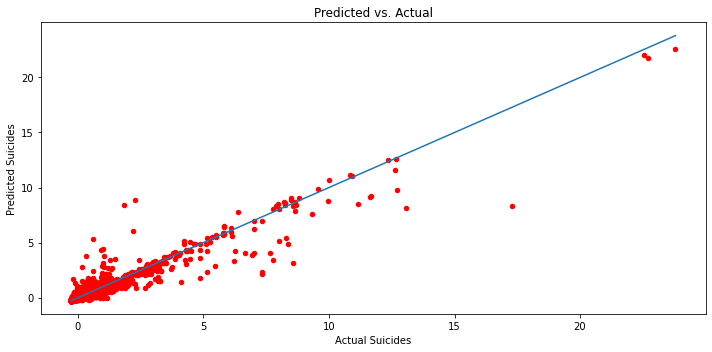

In [10]:
plt.figure(figsize=(10, 5))
plt.scatter(test_y, pred_y, s=20, color="red")
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Suicides')
plt.ylabel('Predicted Suicides')

plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)])
plt.tight_layout()

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
print('R2 Score:', metrics.r2_score(test_y, pred_y))

Mean Absolute Error: 0.06711806526692891
Mean Squared Error: 0.08766971681456451
Root Mean Squared Error: 0.2960907239589996
R2 Score: 0.9130969786332219
